In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse

In [104]:
df= pd.read_csv("C:\\Users\\Lenovo\\Desktop\\NASSCOM\\Dataset District\\Adilabad.csv")

In [105]:
df

,date,pm10,SO2,NO2,rainfall
0,01/01/2016,NaN,NaN,NaN,NaN
1,01/02/2016,NaN,NaN,NaN,NaN
2,01/03/2016,NaN,NaN,NaN,NaN
3,01/04/2016,NaN,NaN,NaN,NaN
4,01/05/2016,NaN,NaN,NaN,NaN
...,...,...,...,...,...
79,01/08/2022,56.0,8.5,26.2,212.6
80,01/09/2022,54.0,9.7,27.5,254.3
81,01/10/2022,62.0,10.9,29.3,NaN
82,01/11/2022,58.0,7.5,26.4,NaN


In [106]:
df['date']=pd.to_datetime(df.date, format='%d/%m/%Y')


In [107]:
df[df['pm10'].isnull()]

,date,pm10,SO2,NO2,rainfall
0,2016-01-01,NaN,NaN,NaN,NaN
1,2016-02-01,NaN,NaN,NaN,NaN
2,2016-03-01,NaN,NaN,NaN,NaN
3,2016-04-01,NaN,NaN,NaN,NaN
4,2016-05-01,NaN,NaN,NaN,NaN
52,2020-05-01,NaN,NaN,NaN,48.9
58,2020-11-01,NaN,NaN,NaN,NaN
59,2020-12-01,NaN,NaN,NaN,NaN
60,2021-01-01,NaN,NaN,NaN,NaN
65,2021-06-01,NaN,NaN,NaN,183.9


In [108]:
df= df.set_index('date')

In [109]:
df["rainfall"]=df["rainfall"].fillna(0)                       #filling nan with zeros as their was no rain fall during that month

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84 entries, 2016-01-01 to 2022-12-01
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pm10      66 non-null     float64
 1   SO2       66 non-null     float64
 2   NO2       66 non-null     float64
 3   rainfall  84 non-null     float64
dtypes: float64(4)
memory usage: 3.3 KB


In [111]:
df1= pd.DataFrame(columns=['pm10', 'SO2', 'NOx']) # converting to Dataframe


In [112]:
# Here we are interpolating the missing data
df1['pm10']=df['pm10'].interpolate(method='nearest')
df1['SO2']=df['SO2'].interpolate(method='nearest')
df1['NOx']=df['NO2'].interpolate(method='nearest')


In [113]:
df1[df1['pm10'].isnull()]

,pm10,SO2,NOx
date,,,
2016-01-01,NaN,NaN,NaN
2016-02-01,NaN,NaN,NaN
2016-03-01,NaN,NaN,NaN
2016-04-01,NaN,NaN,NaN
2016-05-01,NaN,NaN,NaN


#As we can see the our initial values are missing, the above interpolation worked only in forward direction, so we will use interploation function one more time but in backward direction 

In [114]:
df1['NOx']=df1['NOx'].interpolate(method='backfill')
df1['pm10']=df1['pm10'].interpolate(method='backfill')
df1['SO2']=df1['SO2'].interpolate(method='backfill')


In [115]:
df1[df1['pm10'].isnull()]

,pm10,SO2,NOx
date,,,


In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

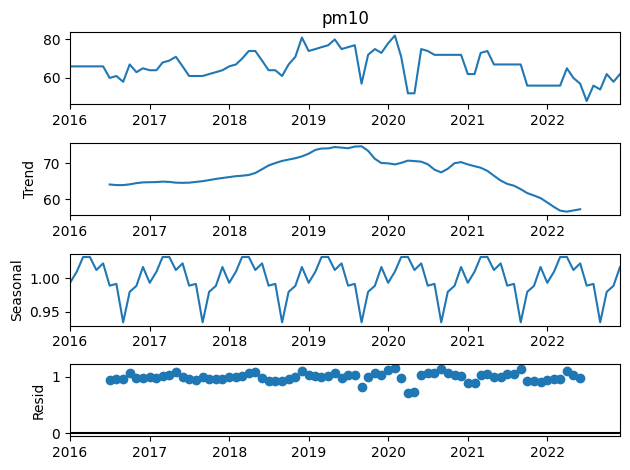

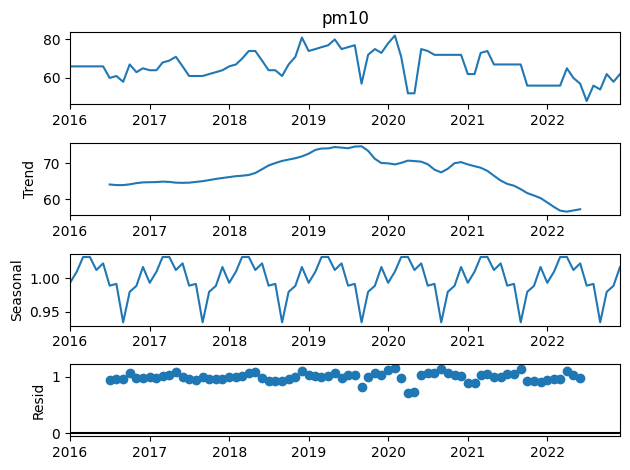

In [116]:
# Plotting seasonal decomposition to see the seasonality and trend in the data
decompose_result = seasonal_decompose(df1['pm10'], period=12 ,model='mul')
decompose_result.plot()

#### During covid lockdown PM10 dropped by almost 45%, so this will create outlier in our data. So we will clean our data
#### PM10 during April and May 2020 were affected, as june, july are rainy season so PM10 conc in air decreases

In [127]:
train=df1['SO2'][:72]  # Splitting in train and test
test=df1['SO2'][72:]

In [118]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing  

In [128]:
# Training and testing Holt Winters Model on SO2 concentration data
adilabad_so2 = ExponentialSmoothing(
    train,
    seasonal_periods=12,
    trend="add",
    seasonal="add", 
    initialization_method="estimated", 
    damped_trend=True
).fit(optimized=True, remove_bias=True)

prediction= adilabad_so2.forecast(len(test))

for i in range(len(test)):
    print("Prediction:{}   Expected:{}".format(prediction[i], test[i]))
rmse= mse(test, prediction, squared=False)
print("RMSE: ",rmse)
mape1= mape(test, prediction)
print("MAPE: %.2f" %(mape1*100),"%")

Prediction:8.329832650398636   Expected:8.2
Prediction:8.315763158716962   Expected:8.2
Prediction:8.48507114443922   Expected:8.2
Prediction:7.771079510669697   Expected:9.5
Prediction:7.640469775888038   Expected:7.9
Prediction:7.926577221409272   Expected:8.6
Prediction:8.246042627066426   Expected:6.8
Prediction:7.915599286733078   Expected:8.5
Prediction:8.135191359172268   Expected:9.7
Prediction:8.571532042743652   Expected:10.9
Prediction:8.757945373681451   Expected:7.5
Prediction:8.761099730004737   Expected:9.5
RMSE:  1.1566076896575797
MAPE: 10.50 %


C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [130]:
train1=df1["pm10"][:72]
test1=df1["pm10"][72:]

In [131]:
# Training and testing Holt Winters Model on pm10 concentration data

adilabad_pm10 = ExponentialSmoothing(
    train1,
    seasonal_periods=12,
    trend="mul",
    seasonal="mul", 
    initialization_method="estimated", 
    damped_trend=True
).fit(optimized=True)

prediction1= adilabad_pm10.forecast(len(test))
for i in range(len(test1)):
    print("Prediction:{}   Expected:{}".format(prediction1[i], test1[i]))
rmse= mse(test1, prediction1, squared=False)
print("RMSE: ",rmse)
mape1= mape(test1, prediction1)
print("MAPE: %.2f" %(mape1*100),"%")

Prediction:54.71382946810853   Expected:56.0
Prediction:55.903118050813326   Expected:56.0
Prediction:56.74063726689376   Expected:56.0
Prediction:55.40164300478135   Expected:65.0
Prediction:55.48924766798592   Expected:60.0
Prediction:55.909839646811626   Expected:57.0
Prediction:54.23375897916586   Expected:48.0
Prediction:54.49182371020961   Expected:56.0
Prediction:50.95866068583638   Expected:54.0
Prediction:53.61758645877601   Expected:62.0
Prediction:54.51567325781779   Expected:58.0
Prediction:56.31230135079916   Expected:62.0
RMSE:  4.83920925544823
MAPE: 6.50 %


C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [132]:
train2=df1["NOx"][:72]
test2=df1["NOx"][72:]

In [133]:
# Training and testing Holt Winters Model on NOx concentration data

adilabad_nox = ExponentialSmoothing(
    train2,
    seasonal_periods=12,
    trend="mul",
    seasonal="mul", 
    initialization_method="estimated", 
    damped_trend=True
).fit(optimized=True)

prediction2= adilabad_nox.forecast(len(test))
for i in range(len(test1)):
    print("Prediction:{}   Expected:{}".format(prediction2[i], test2[i]))
rmse= mse(test2, prediction2, squared=False)
print("RMSE: ",rmse)
mape1= mape(test2, prediction2)
print("MAPE: %.2f" %(mape1*100),"%")

Prediction:25.852460141568834   Expected:25.6
Prediction:25.531846246381768   Expected:25.6
Prediction:24.578289696221734   Expected:25.6
Prediction:23.40073031660306   Expected:28.2
Prediction:22.757146929189304   Expected:26.5
Prediction:24.260895936545023   Expected:25.0
Prediction:24.513144153600415   Expected:23.1
Prediction:23.730700498656127   Expected:26.2
Prediction:24.325715418699883   Expected:27.5
Prediction:26.167902515040538   Expected:29.3
Prediction:25.73094086143999   Expected:26.4
Prediction:25.64799247948013   Expected:25.3
RMSE:  2.367307876814789
MAPE: 6.75 %


C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [68]:
# Prediction for year 2023 for SO2 concentration
adilabad_so2_pred = ExponentialSmoothing(
    df1["SO2"],
    seasonal_periods=12,
    trend="add",
    seasonal="add", 
    initialization_method="estimated", 
    damped_trend=True
).fit(optimized=True)

pred_2023_SO2= adilabad_so2_pred.forecast(len(test))

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [67]:
# Prediction for year 2023 for NOx concentration

adilabad_nox_pred = ExponentialSmoothing(
    df1['NOx'],
    seasonal_periods=12,
    trend="mul",
    seasonal="mul", 
    initialization_method="estimated", 
    damped_trend=True
).fit(optimized=True)

pred_2023_NOx= adilabad_nox_pred.forecast(len(test))

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [66]:
# Prediction for year 2023 for pm10 concentration

adilabad_pm10_pred = ExponentialSmoothing(
    df1['pm10'],
    seasonal_periods=12,
    trend="add",
    seasonal="add", 
    initialization_method="estimated", 
    damped_trend=True
).fit(optimized=True)

pred_2023_PM10= adilabad_pm10_pred.forecast(len(test))

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [69]:
pred= pd.DataFrame(data=pred_2023_SO2, columns=['SO2']) # Storing the predicted values in a data frame
pred['PM10']=pred_2023_PM10
pred['NOx']=pred_2023_NOx

In [70]:
pred

,SO2,PM10,NOx
2023-01-01,9.464992,59.952881,25.513686
2023-02-01,9.455267,61.593408,25.267645
2023-03-01,9.885275,63.125958,24.507045
2023-04-01,9.312340,62.542168,24.034676
2023-05-01,8.965243,61.409148,23.206115
2023-06-01,9.158538,61.721744,24.130866
2023-07-01,9.163902,58.191250,24.028307
2023-08-01,9.109941,59.386165,23.875885
2023-09-01,9.454058,55.445648,24.600997
2023-10-01,9.981846,59.513190,26.423843


In [72]:
## PM10 Sub-Index calculation
def PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150

pred["PM10_SubIndex"] = pred["PM10"].apply(lambda x: PM10_subindex(x))

In [73]:
## NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    else:
        return 0

pred["NOx_SubIndex"] = pred['NOx'].apply(lambda x: get_NOx_subindex(x))

In [74]:
## SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    else:
        return 0

pred["SO2_SubIndex"] = pred["SO2"].apply(lambda x: get_SO2_subindex(x))

In [75]:
pred

,SO2,PM10,NOx,PM10_SubIndex,NOx_SubIndex,SO2_SubIndex
2023-01-01,9.464992,59.952881,25.513686,59.952881,31.892108,11.831239
2023-02-01,9.455267,61.593408,25.267645,61.593408,31.584556,11.819084
2023-03-01,9.885275,63.125958,24.507045,63.125958,30.633806,12.356594
2023-04-01,9.312340,62.542168,24.034676,62.542168,30.043346,11.640425
2023-05-01,8.965243,61.409148,23.206115,61.409148,29.007644,11.206554
2023-06-01,9.158538,61.721744,24.130866,61.721744,30.163583,11.448173
2023-07-01,9.163902,58.191250,24.028307,58.191250,30.035384,11.454878
2023-08-01,9.109941,59.386165,23.875885,59.386165,29.844856,11.387426
2023-09-01,9.454058,55.445648,24.600997,55.445648,30.751247,11.817572
2023-10-01,9.981846,59.513190,26.423843,59.513190,33.029804,12.477307


In [76]:
pred['AQI']=''

In [77]:
for i in range(len(pred)):
    pred["AQI"][i]= max(pred["SO2_SubIndex"][i],pred["PM10_SubIndex"][i],pred["NOx_SubIndex"][i])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23428\3451392264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred["AQI"][i]= max(pred["SO2_SubIndex"][i],pred["PM10_SubIndex"][i],pred["NOx_SubIndex"][i])


In [78]:
pred      # Final data 

,SO2,PM10,NOx,PM10_SubIndex,NOx_SubIndex,SO2_SubIndex,AQI
2023-01-01,9.464992,59.952881,25.513686,59.952881,31.892108,11.831239,59.952881
2023-02-01,9.455267,61.593408,25.267645,61.593408,31.584556,11.819084,61.593408
2023-03-01,9.885275,63.125958,24.507045,63.125958,30.633806,12.356594,63.125958
2023-04-01,9.312340,62.542168,24.034676,62.542168,30.043346,11.640425,62.542168
2023-05-01,8.965243,61.409148,23.206115,61.409148,29.007644,11.206554,61.409148
2023-06-01,9.158538,61.721744,24.130866,61.721744,30.163583,11.448173,61.721744
2023-07-01,9.163902,58.191250,24.028307,58.191250,30.035384,11.454878,58.19125
2023-08-01,9.109941,59.386165,23.875885,59.386165,29.844856,11.387426,59.386165
2023-09-01,9.454058,55.445648,24.600997,55.445648,30.751247,11.817572,55.445648
2023-10-01,9.981846,59.513190,26.423843,59.513190,33.029804,12.477307,59.51319


In [79]:
pred.to_csv("C:\\Users\\Lenovo\\Desktop\\NASSCOM\\Prediction\\adilabad_aqi_prediction.csv") # Appending the data to a csv file